Monitoring
===
This script produce time plots of temperature, humidity, trigger rate and accidental rate. Information taken from the parsing dictionary that reads the SLOWCONTROL file.

**Minimal requirement: Run parsing step**

To remove this requirements, it is necessary to read directly from the SLOWCONTROL file.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import utils

def time_plot(var, time, **kwargs):
    ref = kwargs.get('ref', None)
    xaxis = kwargs.get('xaxis', None)
    yaxis = kwargs.get('yaxis', None)
    title = kwargs.get('title', None)

    # Main plot
    fig = plt.figure(figsize=(10,5))
    ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # left, bottom, width, height
    ax_main.plot(time, var, marker='.')
    if ref is not None:
        ax_main.plot(time,ref, marker='',  color='gray', linestyle='--')


    ax_main.set_xlabel(xaxis['label']) if xaxis else  ax_main.set_xlabel("Time")
    ax_main.set_ylabel(yaxis['label']) if yaxis else ax_main.set_ylabel("a.u.")
    ax_main.set_ylim(yaxis['range']) if yaxis and 'range' in yaxis else None
        

    if title: plt.title(title)
    fig.autofmt_xdate()   # rotate date labels
    ax_main.grid(True)
    plt.show()




def run_plots(
    run_range,
    parsed_files_path,
    temperature=True,
    humidity=True,
    trigger_rate=True,
    accidental_rate=True
):
    info_list = []
    runs = []

    for run in run_range:
        runs.append(run)
        info = utils.read_run_info_from_json(
           parsed_files_path + f'ADC_run{run}.json'
        )
        info_list.append(info)

    trs = utils.extract_var("trigger_rate", info_list)
    ars = utils.extract_var("accidental_rate", info_list)
    times = utils.extract_time(info_list)
    temperatures = utils.extract_var("temperature", info_list)
    wps = utils.extract_var("working_point", info_list)

    if trigger_rate:
        time_plot(np.array(trs), np.array(runs),
                        xaxis={'label': 'Run'},
                        yaxis={'label': 'Trigger Rate', 'range': (0, 30)})

    if accidental_rate:
        time_plot(np.array(ars), np.array(runs),
                        xaxis={'label': 'Run'},
                        yaxis={'label': 'Accidental Rate'})

    if temperature:
        time_plot(np.array(temperatures), np.array(times),
                        ref=np.array(wps),
                        xaxis={'label': 'Time'},
                        yaxis={'label': 'Temperature (°C)', 'range': (10, 30)})


/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


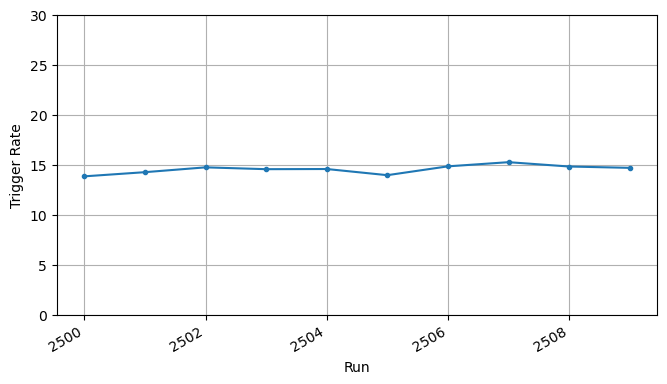

/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


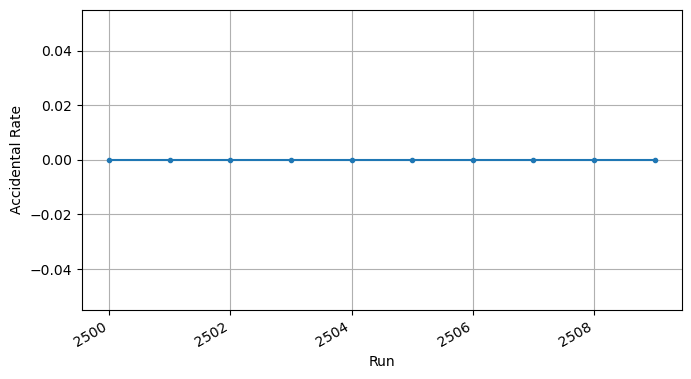

/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


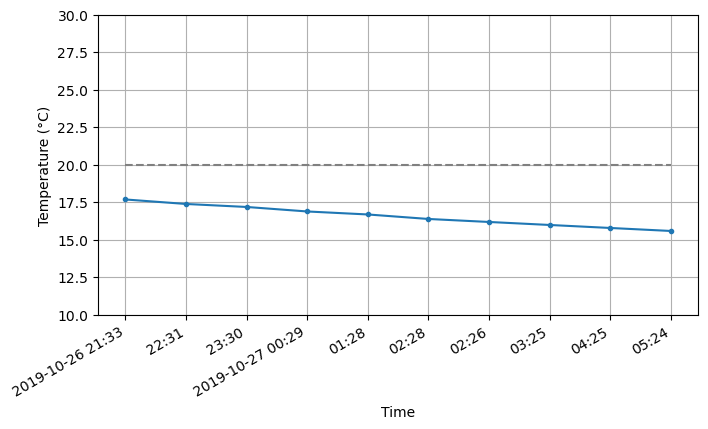

In [51]:
#import plots

run_range = range(2500,2510,1)
temperature     = True
humidity        = False
trigger_rate    = True
accidental_rate = True

parsed_files_path = '/group/Muography/abiolchi/test/PARSED/'
hodoscope_color = 'NERO/'
version = 'v0/'
filepath = parsed_files_path + hodoscope_color + version 
    
run_plots(run_range, filepath, temperature=temperature, humidity=humidity, trigger_rate=trigger_rate, accidental_rate=accidental_rate)



